In [104]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [105]:
# Load images
image1 = cv2.imread('./notre1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./notre2.jpg', cv2.IMREAD_GRAYSCALE)

In [106]:
# Initiate SIFT detector
sift = cv2.SIFT_create(nfeatures=150) # Limit to 150 keypoints

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image1,None)
kp2, des2 = sift.detectAndCompute(image2,None)

In [107]:
# Image 1 keypoints
# TODO: create  manual keypoints at [(255,150,30), (200,190,15)] and display
sift = cv2.SIFT_create()
# kp1 = [cv2.KeyPoint(x=255, y=150, size=30),
#        cv2.KeyPoint(x=200, y=190, size=15)]
# des1 = sift.compute(image1, kp1)
img1_keypoints = cv2.drawKeypoints(image1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color=(255,0,0))

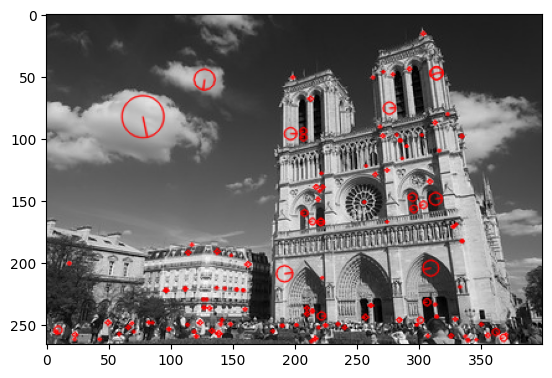

In [108]:
plt.imshow(img1_keypoints)
plt.show()

In [109]:
# Image 2 keypoints
# TODO: create  manual keypoints at [(115, 175, 30), (168,155, 15), (25,216,15), (50,214,15), (160,210,15)] and display
sift = cv2.SIFT_create()
# kp2 = [cv2.KeyPoint(x=115, y=175, size=30),
#        cv2.KeyPoint(x=168, y=155, size=15),
#        cv2.KeyPoint(x=25, y=216, size=15),
#        cv2.KeyPoint(x=50, y=214, size=15),
#        cv2.KeyPoint(x=160, y=210, size=15)]

# des2 = sift.compute(image2, kp2)
img2_keypoints = cv2.drawKeypoints(image2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color=(255,0,0))



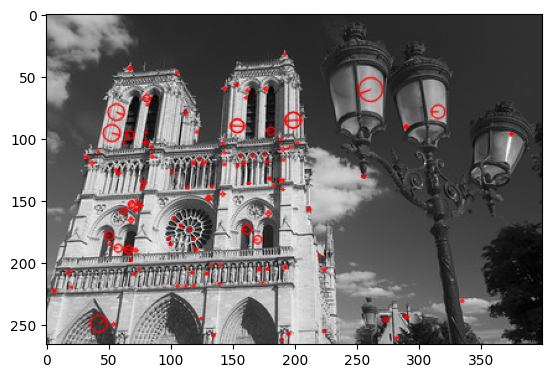

In [110]:
plt.imshow(img2_keypoints)
plt.show()

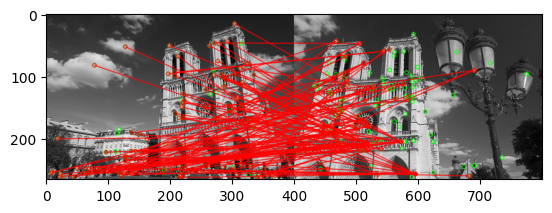

In [111]:
# Match descriptors
bf = cv2.BFMatcher()
matches = bf.match(des1[1],des2[1])

# Draw first 10 matches.
matched_image_match = cv2.drawMatches(
    image1, kp1,
    image2, kp2,
    matches,
    None,
    flags=cv2.DrawMatchesFlags_DEFAULT,
    singlePointColor=(0,255,0),
    matchColor=255)

plt.imshow(matched_image_match)
plt.show()

## Nearest Neighbor Distance Ratio
Nearest Neighbor Distance Ratio = $\frac{NN1}{NN2}$

where NN1 is the distance to the first nearest neighbor and NN2 is the distance to the second nearest neighbor.

Sorting by this ratio puts matches in order of confidence.
Keep only those matches where $\frac{NN1}{NN2}$  < some threshold



In [112]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1[1],des2[1],2)

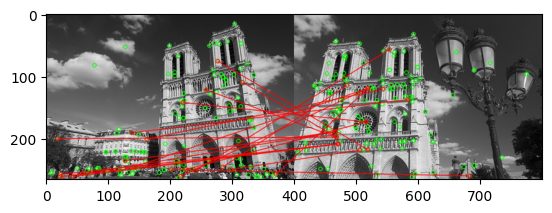

In [113]:
# TODO
# Keep only those matches where Nearest Neighbor Distance Ratio is less than 0.8
# Apply ratio test
good_matches = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good_matches.append(m)

# Draw good matches
matched_image = cv2.drawMatches(
    image1, kp1,
    image2, kp2,
    good_matches,
    None,
    flags=cv2.DrawMatchesFlags_DEFAULT,
    singlePointColor=(0,255,0),
    matchColor=255)

plt.imshow(matched_image)
plt.show()
